# <span id="chap_er_networks_components"></span> The components of an ER network

The [components](concepts-components.ipynb#sec_concepts_components_components) of a network are its connected sub-networks. A network may have one or more components. Suppose we construct an ER network using the [generating process we looked at earlier](er-networks.ipynb#sec_er_networks_building): is it connected? Or might it have a number of components? And how might this number change as we add edges?

## <span id="sec_er_networks_components_process"></span> What happens as we add edges to a network?

When we created ER networks earlier, we started with an empty network of $N$ and then added edges between pairs of nodes with a given probability $\phi$. We [know](er-networks-maths.ipynb#sec_er_networks_maths_mean_degree) that this will eventually lead to a network with mean degree $N\phi$. But let's look at the process from a slightly different perspective: what happens *as we add the nodes*? Specifically, how do the nodes become connected as we add edges?

Intuitively we can argue as follows. We start with an empty network. Adding an edge necessarily build a 2-node component. Adding another edge is (for a larrge network, anyway) overwhelmingly like to pick two other nodes not in the first component, forming a second. We can continue like this for some time, but gradually it will become more likely that one of the nodes we choose to connect is not isolated by rather part of a larger cluster: indeed, *both* nodes may be part *different* clusters, which thereby become joined into a a single one. As we continue to add edges, it starts to become increasingly likely that the edges will placed be between increasingly large components, thereby connecting them. And as a component becomes larger, there are more ways to connect to it (since there are more nodes to choose as endpoints), so we might expect that large components grow at the expense of small components. Eventually the network may become one large component, but even before this we might expect that there will be one or more components that are large relative to the others and to the size of the network as a whole.  

### <span id="sec_er_networks_components_giant"></span> The giant component

This is indeed what happens. As we add edges to the initially-empty network according to the ER process, we create a large number of small components that over time connect to each other. Because large components are easier to connect to they grow faster, which leads to the formation of a component that contains a large fraction of the nodes: the **giant component**.

Does the giant component necessarily form? A moment's thought will suggest not: if we only add a small number of edges, then clearly there won't be enough for a giant component to form.

## <span id="sec_er_networks_components_mathematics"></span> The mathematics of the giant component

Let's denote the size of the largest component in a network by $N_G$. How does $N_G$ vary as we add edges?

Starting from an empty network, we have $N_G = 1$ since every node is its own small cluster. The ratio of the size of the "giant" component to the size of the network, $\frac{N_G}{N} \rightarrow 0$ as $N \rightarrow \infty$: the giant component is an insignificant fraction of the nodes. As we add nodes, we expect $N_G$ to increase. If we were to set $\phi = 1$ and add *all* possible edges, then at the end of the process we would have $\frac{N_G}{N} = 1$, the giant component containing all the nodes. We can think of $\frac{N_G}{N}$ as the probability that a node chosen at random will be in the giant component. Let's refer to this probability as $S$.

How does a node $i$ end up outside the giant component? It means that, for every other node $j$ in the network,

* either $i$ is not connected to $j$; or
* $i$ i is connected to $j$ but $j$ is itself not in the giant component.

For a particular node $j$, the probability of the first case is $(1 - \phi)$ (since the probability of their being an edge added is $\phi$; the probability of the second case is $\phi (1 - S)$, there being an edge between $i$ and $j$ (which is $\phi$) *and* $j$ not being in the giant component (which is $(1 - S)$). If we sum-up this probability for every $j$, then the probability we are looking for is given by the recurrence equation $1 - S = ((1 - \phi) + \phi (1 - S))^{N - 1}$. If we re-arrange this slightly,

\begin{align*}
    1 - S       &=       (1 - \phi + \phi - \phi S)^{N - 1} \\
                &\approx (1 - \phi S)^N \\
                &=       (1 - \frac{\langle k \rangle}{N} S)^N
\end{align*}

where we used $\phi = \frac{\langle k \rangle}{N}$. Taking logs on both sides,

\begin{align*}
    \ln (1 - S) &= N \, \ln (1 - \frac{\langle k \rangle}{N} S) \\
                &= -N \frac{\langle k \rangle}{N} S) \\
                &= - \langle k \rangle S \\
\end{align*}

Then we can take exponentials on each side, leading to:

\begin{align*}
          1 - S &=       e^{- \langle k \rangle S} \\
              S &=       1 - e^{- \langle k \rangle S}
\end{align*}

This is still an awkward recurrence equation: $S$ appears on both sides. Situations like this often have no closed-form solution, but there's a trick to make progress, which is to make use of a graphical method.

In [1]:
import networkx
import math
import numpy

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import seaborn

/Users/sd/programming/cncp/cncp/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


If we draw the curves $y = S$ and $y = 1 - e^{- \langle k \rangle S}$ against $S$  for different values of $\langle k \rangle$, then the curves will cross at the points where they are equal &ndash; and we can read-off at least the approximate value of $S$ for which this occurs:

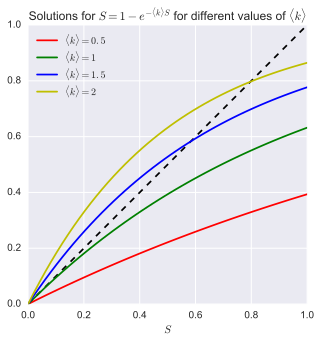

In [2]:
fig = plt.figure(figsize = (5, 5))

# create a set of points for S, evenly spaced over the interval [0.0, 1.0]
ss = numpy.linspace(0.0, 1.0)

# different kmeans and their associated line types
kmeans = [ 0.5, 1, 1.5, 2 ]
lines = [ 'r-', 'g-', 'b-', 'y-' ]

# Build a function parameterised by kmean ro tun over S
def make_S( kmean ):
    return (lambda S: 1.0 - math.exp(-kmean * S))

# plot S against S
plt.plot(ss, ss, 'k--')

# plot the exponential curves for the different selected kmeans
for i in range(len(kmeans)):
    kmean = kmeans[i]
    line = lines[i]
    
    # map the appropriate function across S
    ys = map(make_S(kmean), ss)
    
    # plot the curve
    plt.plot(ss, ys, line, label = '$\\langle k \\rangle = {k}$'.format(k = kmean))
    
plt.xlabel('$S$')
plt.title('Solutions for $S = 1 - e^{-\\langle k \\rangle S}$ for different values of $\\langle k \\rangle$')
plt.legend(loc = 'upper left')
_ = plt.show()

So by inspection for $\langle k \rangle = 1.5$ there is a solution at approximately $S = 0.58$, while for $\langle k \rangle = 2$ there is a solution at approximately $S = 0.8$ &ndash; 80% of the nodes in the network are in the giant component.

Looking at the lines for the different values of $\langle k \rangle$, notice that as $\langle k \rangle$ increases the corresponding curve starts out steeper. Shallow curver never intersect $y = S$, meaning no giant component emerges; as the curves get steeper, a solution emerges starting at low values of $S$ and gradually moving towards $S = 1$. The separator between these two regimes occurs when the initial gradient of the curve matches that of $y = S$, when the curve and the line are tangent to each other at $S = 0$. This separator is referred to as a **critical transition** or a **critical threshold**, because it's the critical value at which behaviour abruptly changes. It happens when:

$$
    \frac{d}{dS} (1 - e^{-\langle k \rangle S}) = 1
$$

and so:

$$
    \langle k \rangle e^{-\langle k \rangle S} = 1
$$

At $S = 0$ we discover that the critical threshold $\langle k \rangle_c = 1$.

We can of course also relate $\langle k \rangle_c$ back to $\phi$, the probability of adding an edge, and discover that the critical threshold probability $\phi_c$ below which the giant component doesn't form, but above which it does (a point we explore a little more below). For $\langle k \rangle_c = 1$ we have that $\phi_c = \frac{1}{N}$.

Let these two results sink in for a minute. Firstly, a mean degree of 1 &ndash; every node attached to on average one neighbnour &ndash; is enough to start forming a giant component and therefore, by implication, to take the network towards being connected. Secondly, for a large ER network even a vanishingly small number of edges will result in the formation of a giant component &ndash; and that number gets smaller as the network gets bigger! This all suggests that giant components will be common, so a lot of the networks we encounter in applications will have one. 



Alternatively we can observe that, while it's hard to find $S$ in terms of $\langle k \rangle$, it is easy to find $\langle k \rangle$ in terms of $S$:

\begin{align*}
                    S &= 1 - e^{-\langle k \rangle S} \\
                1 - S &= e^{-\langle k \rangle S} \\
          \ln (1 - S) &= -\langle k \rangle S \\
    \langle k \rangle &= - \frac{\ln (1 - S)}{S}
\end{align*}

Since we're actually interested in $S$ we can plot the curve rotated by ninety degrees for clarity, which yields:

/Users/sd/programming/cncp/cncp/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars


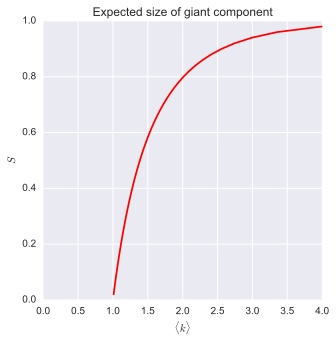

In [3]:
fig = plt.figure(figsize = (5, 5))
ss = numpy.linspace(0.0, 1.0, endpoint = False)     # omit 0.0 to avoid a divide-by-zero error later

plt.xlim([0, 4])
plt.xlabel("$\\langle k \\rangle$")
plt.ylabel("$S$")
plt.plot(map((lambda S: - math.log(1.0 - S) / S), ss), ss, 'r-')
plt.title('Expected size of giant component')
_ = plt.show()

This makes the critical nature of $\langle k \rangle_c = 1$ even more clear. As $\langle k \rangle$ grows beyond $\langle k \rangle_c$, the expected size of the giant component rapidly approaches the size of the network itself. 

The existence and value of the critical threshold was first proven by Erd&#337;s and R&eacute;nyi [[ER59]](#ER59) in a paper that really marks the very start of network science. It shows that, even for small mean degrees, an ER network will have a giant component, and as the mean degree gets larger, that component will span the entire network. Looking at the graph above, you can see that the curve asymptotically approaches $S = 1$ as $\langle k \rangle \rightarrow \infty$. It is never *certain* that the process will connect the network &ndash; it's stochastic, after all &ndash; but it rapidly becomes overwhelmingly likely. 

## <span id="sec_er_networks_components_emergence"></span> The emergence of the giant component

So much for the mathematics: let's look at the emergence of the giant component computationally.

The `networkx` function `number_connected_components()` computes the number of components in a network. To look at the giant component forming, we therefore need to count the number of components over the region around the critical threshold. We expect to see the number of components rapidly drop towards 1, and the fraction of nodes in the largest component rapidly increase towards 1. 

We could therefore create an empty network and progressively add edges to it, counting the number of components as we go. We already have the code for this in our earlier [from-scratch ER network generator](er-networks.ipynb#sec_er_networks_building): however, looking at the code, while the *result* is a random network, the *process* by which edges are added is actually very regular, and we should probably avoid such unnecessary regularity in case it makes a difference. One could easily imagine that adding nodes in a regular fashion might generate components faster (or slower?) than truly random addition.

What we could do instead is to build a random network and then re-construct it by emptying it and then adding the same edges edges in a random order. This destroys any artefacts coming from the way in which we added the edges in the first place.

We first define an iterator that will randomise a list:

In [4]:
from copy import copy

class permuted:
    """An iterator for the elements of an array in a random order."""
    
    def __init__( self, es ):
        """Return an iterator for the elements of an array in a random order.
        
        :param es: the original elements"""
        self.elements = copy(es)            # copy the data to be permuted
    
    def __iter__( self ):
        """Return the iterator.
        
        :returns: a random iterator over the elements"""
        return self
    
    def next( self ):
        """Return a random element
        
        :returns: a random elkement of the original collection"""
        n = len(self.elements)
        if n == 0:
            raise StopIteration
        else:
            i = int(numpy.random.random() * n)
            v = self.elements[i]
            del self.elements[i]
            return v

We can then write a function that replays a list of edges in random order into another, initially empty, network, computing the number of components as we go:

In [9]:
def growing_component_numbers( n, es ):
    """Build the graph with n nodes and add edges randomly from es, returning
    a list of the number of components in the graph as we add edges in a
    random order taken from a list of possible edges.
    
    :param n: the number of nodes
    :param es: the edges
    :returns: the number of components as each edge is added"""

    # create an empty graph
    g = networkx.empty_graph(n)

    # add edges to g taken at random from the edge set,
    # and compute components after each edge
    cs = []
    for e in permuted(es):
        g.add_edge(*e)

        nc = networkx.number_connected_components(g)
        cs.append(nc)
    return cs

Let's try this on a moderately-sized ER network and plot the number of components against the number of edges:

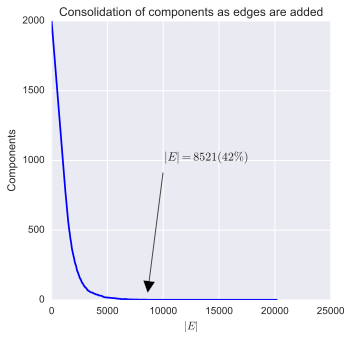

In [10]:
# create an ER networks and grab its edges
er = networkx.erdos_renyi_graph(2000, 0.01)
es = er.edges()

# replay these edges
component_number = growing_component_numbers(2000, es)

# plot components against edges
fig = plt.figure(figsize = (5, 5))
plt.title("Consolidation of components as edges are added")
plt.xlabel("$|E|$")
plt.ylabel("Components")
plt.plot(range(len(component_number)), component_number, 'b-')

# edge at which the giant component forms
i = component_number.index(1)

# highlight the formation of the giant component
ax = fig.gca()
ax.annotate("$|E| = {e} ({p}\\%)$".format(e = i, p = int(((i + 0.0) / len(es)) * 100)),
            xy = (i, 1),
            xytext = (len(component_number) / 2, component_number[0] / 2),
            arrowprops = dict(facecolor = 'black', width = 1, shrink = 0.05))

_ = plt.show()

The giant component forms well before we've added all the edges.

(Remember that thisd is a stochastic process. It's *possible* that a giant component would *never* form for a network, just by chance. However, for an ER network with 2000 nodes $\phi_c = \frac{1}{N} = 0.0005$, so $\phi = 0.01$ is well above the critical threshold.)

But *how* does the giant component form? Does it steadily accrete, or does it form suddenly as previously disconnected components connect? We can explore this by plotting the size of the largest component as we add edges, using the function `connected_components()` that returns a list of components, largest first: 

In [11]:
def growing_component_sizes( n, es ):
    """Build the graph with n nodes and edges taken from es, returning
    a list of the size of the largest component as we add edges in a
    random order taken from a list of possible edges.
    
    :param n: number of edges
    :param es: the edges
    :returns: liost of largest component as each edge is added"""
    g = networkx.empty_graph(n)

    cs = []
    for e in permuted(es):
        g.add_edge(*e)

        # pick the largest component (the one with the longest list of node members)
        gc = len(max(networkx.connected_components(g), key = len))
        
        cs.append(gc)
    return cs

Let's plot the size of the largest component against the number of edges added. Since we know when the giant component forms, we can limit ourselves to just plotting this region. For completeness, let's also show the *number* of components on the same axes:

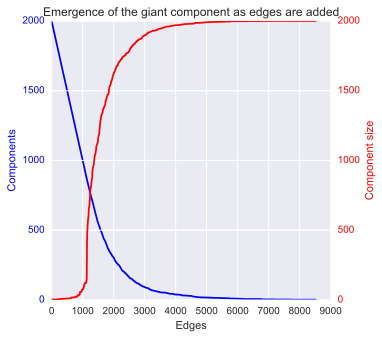

In [12]:
# compute list of component sizes as we add edges, re-using the
# ER edges we computed earlier
component_size = growing_component_sizes(2000, es)

fig = plt.figure(figsize = (5, 5))
plt.title("Emergence of the giant component as edges are added")

# plot the number of components
ax1 = fig.gca()
ax1.set_xlabel("Edges")
ax1.set_ylabel("Components", color = 'b')
ax1.plot(range(i), component_number[:i], 'b-', label = 'Components')
for t in ax1.get_yticklabels():
    t.set_color('b')

# plot component sizes against edges
ax2 = ax1.twinx()
ax2.set_ylabel("Component size", color = 'r')
ax2.plot(range(i), component_size[:i], 'r-', label = "Component size")
for t in ax2.get_yticklabels():
    t.set_color('r')

_ = plt.show()

Now isn't *that* interesting... Let's try to interpret what's happening. Quite early-on in the process of adding edges, there's a sudden jump in the size of the largest component in the network. Well before we get to the giant component, we start getting a component of hundreds, and then thousands, of nodes. The process by which we're adding edges is random and smooth, but nonetheless results in a sudden change in the connectivity of the network. The network consists of lots of small components that suddenly &ndash; over the course of adding a relatively small number of edges &ndash; join up and create an enormously larger component consisting of most of the nodes, which then itself gradually grows until it contains *all* the nodes. Below this threshold the network is composed of small, isolated collections of nodes; above it, it rapidly becomes one big component.

This is the first example we've seen of a critical transition, also known as a **phase change**: during a steady, incremental, process, the network changes from one state into another, very different state &ndash; and does so almost instantaneously.

We should examine the area around the critical point in more detail. First we need to locate it. Since the characteristic of the critical point is that the slope of the graph suddenly increases, we can look for it by looking at the slope of the data series: 

In [13]:
def critical_point( cs, slope = 1 ):
    """Find the critical point in a sequence. We define the critical point
    as the index where the derivative of the sequence becomes greater than
    the desired slope. We ignore the direction of the slope.
    
    :param cs: the sequence of component sizes
    :param slope: the desired slope of the graph (defaults to 1)
    :returns: the point at which the slope of the time series exceeds the desired slope"""
    for i in xrange(1, len(cs)):
        if abs(cs[i] - cs[i - 1]) > slope: 
            return i
    return None

This is a bit heuristic, buit we can pick a "large" slope to use as an indicator for the onset of emergence. We can then plot the vicinity of the critical point to see the critical transition in detail:

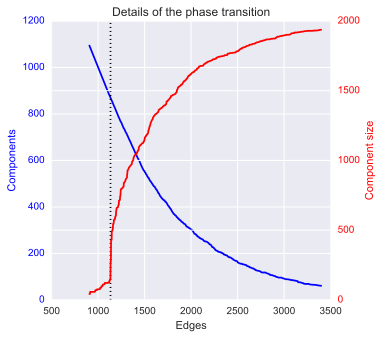

In [14]:
# find the critical point
cp = critical_point(component_size, slope = 50)

# some space either side of the critical point, with the
# right-hand side being more interesting and so getting more
bcp = int(cp * 0.8)
ucp = int(cp * 3)

fig = plt.figure(figsize = (5, 5))
plt.title("Details of the phase transition")

# plot the number of components
ax1 = fig.gca()
ax1.set_xlabel("Edges")
ax1.set_ylabel("Components", color = 'b')
ax1.plot(range(bcp, ucp), component_number[bcp:ucp], 'b-', label = 'Components')
for t in ax1.get_yticklabels():
    t.set_color('b')

# plot component sizes against edges
ax2 = ax1.twinx()
ax2.set_ylabel("Component size", color = 'r')
ax2.plot(range(bcp, ucp), component_size[bcp:ucp], 'r-', label = "Component size")
for t in ax2.get_yticklabels():
    t.set_color('r')

# add a line to show where we decided the critical point was
ax1.plot([cp, cp],           # x's: vertical line at the critical point
         ax1.get_ylim(),     # y's: the y axis' extent
         'k:')

_ = plt.show()

So while the *number of components* comes down fairly smoothly, the *size of the largest component* jumps quickly as smaller components amalgamate.

### <span id="sec_er_networks_components_theory_practice"></span> Theory meeting practice

We now have a predictive solution for the emergence of the giant component, and a simulated version. For completeness we should make sure that they match, and the easiest way to do that is to plot them both on the same axes:

/Users/sd/programming/cncp/cncp/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in double_scalars


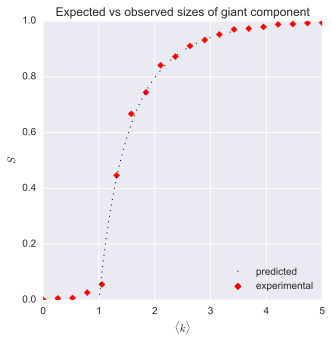

In [16]:
def make_er_giant_component_size_by_kmean( n ):
    """Return a model function for a network with the given number
    of nodes, computing the fractional size of the giant component
    for different mean degrees.
    :param n: the number of nodes"""
    def model( kmean ):
        phi = kmean / n
        er = networkx.erdos_renyi_graph(n, phi)
        gc = len(max(networkx.connected_components(er), key = len))
        S = (gc + 0.0) / n
        return S
    return model

fig = plt.figure(figsize = (5, 5))

# plot the observed behaviour
kmeans = numpy.linspace(0.0, 5.0, num = 20)
sz = map(make_er_giant_component_size_by_kmean(2000), kmeans)
plt.scatter(kmeans, sz, color = 'r', marker = 'D', label = 'experimental')

# plt the theoretical behaviour
ss = numpy.linspace(0.0, 1.0, endpoint = False)
plt.plot(map((lambda S: - math.log(1.0 - S) / S), ss), ss, 'k,', label = 'predicted')

plt.xlim([0, 5])
plt.ylim([0.0, 1.0])
plt.title('Expected vs observed sizes of giant component')
plt.xlabel('$\\langle k \\rangle$')
plt.ylabel('$S$')
plt.legend(loc = 'lower right')

_ = plt.show()

You'll notice this curve doesn't exactly follow what the analytical solution would suggest: we get a tiny take-off slightly before $\langle k \rangle = 1$, and the curve isn't smooth. The analytical model is expressed in terms of averages, while the graph above is generated from *one specific* ER network that *might* happen to have properties that cause a giant component to form, or not form, or form with a slightly different size than predicted, just because of some fluke of way the edges are added. The mathematical expression gives us the expected behaviour that's overwhemingly probable in the case of large ($N \rightarrow \infty$) networks &ndash; but it can be misleading in any single clase, and in smaller networks.  

## <span id="sec_er_networks_components_summary"></span> Summing up: the right kind of randomness

There are many more properties of components we could explore, but we'll stop here: Newman [[New10]](#New10) presents many more calculations, for example about how the distribution of component sizes changes as edges are added.

There's an important point to make about all we've said above. You'll have noticed that a lot of the arguments relied on averaging, for example in identifying the *average* (mean) degree as greater than 1, or finding the *expected* size of the giant component. You might have wondered whether these sorts of calculations would be possible if for whatever reason we weren't able to do averaging.

Averaging works well for large networks: indeed, for really large networks we *have* to rely on statistical techniques, as all the details will generally be unavailable. And it's certainly the case that lot of phenomena of interest for complex networks (and complex processes) depend strongly on these statistical properties, with only very weak dependence on the details. This means we can often ignore the fine structure, the **micro-scale structure** of a network, and treat them as instances of classes defined by their **macro-scale structure**, the high-level summary statistics. Indeed, this is the basis for the techniques for managing variance by repetition that we'll see later when we scale-out our simulations.

*But*. (There was obviously a *but* coming.) There are also examples in which fine structure *does* matter &ndash; and even more cases where variations or irregularities in the structure make a huge difference. We'll see examples of these later, but an easily-understood example is the way an epidemic spreads on a network with [communities](concepts-components.ipynb#sec_concepts_components_communities) of more-than-averagely-connected nodes: easily within communities, but with more difficulty between them because of the lesser connectivity. This is true even for networks with the same mean degree: the modular structure changes the process' behaviour.

The ER networks are special not because they're random &ndash; lots of networks have randomness &ndash; but because they're *so perfectly* random. They have, on average (that word again...), no fine structure to worry about, and so arguments based on averaging work, both for properties like the degrees of nodes and also for repeating experiments over different networks with the same parameters.

What about for more complex situations? It turns out that the other main class of networks, the powerlaw networks, have similar (but different) regularities that can similarly be exploited. There are other cases that don't have such nice features, and &ndash; while we can sometimes fall back on more powerful mathematical techniques, such as those associated with generating functions &ndash; we'll often be placed in situations where only extensive and careful simulation will get us anywhere. And simulation often requires an understanding of how the network is put together at a macro level as well as some understanding at least of the micro level, so the mathematical and computational views remain entwined. 

## References

<a id="ER59">[ER59]</a> Paul Erdős and Alfred Rényi. On random graphs, I. Publicationes Mathematicae 6, pages 290–297. 1959.

<a id="New10">[New10]</a> M.E.J. Newman. Networks: an introduction. Oxford University Press. 2010. ISBN 978-0-19-920665-0.